Résolution d'équations différentielles d'ordre 2
================================================

**Date:** lundi 24 janvier 2022



## Capacité numérique



-   Équations différentielles d’ordre supérieur ou égal à 2
    -   Transformer une équation différentielle d’ordre n en un système
        différentiel de n équations d’ordre 1
    -   Utiliser la fonction odeint de la bibliothèque scipy.integrate (sa
        spécification étant fournie).



## Modules



Conformément au programme, on utilise la fonction `odeint` du module
`scipy.integrate` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)) pour réaliser l'intégration
**numérique** d'une équation différentielle d'ordre 2.

Notons qu'on pourra lui préférer la fonction `solve_ivp` du même
module offrant davantage de possibilités ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)), en
particulier celle de déterminer les instants où certains évènements
sont réalisés.



In [1]:
%matplotlib inline

La ligne précédente ne doit apparaître que dans les notebooks
`Jupyter`, pas dans un fichier python.



In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy.ma as ma

## Équation différentielle d'ordre 2



### Système d'équations différentielles d'ordre 1



La dynamique du point matériel amène à considérer des équations
différentielles d'ordre 2 de la forme:

$$
\frac{\mathrm{d}^2 x}{\mathrm{d} t^2}  = f\left(x,\frac{\mathrm{d} x}{\mathrm{d} t},t\right).
$$

Les systèmes de résolution numérique sont conçus pour résoudre (voir
par exemple la méthode d'Euler) des équations différentielles
d'ordre 1. On transforme donc

-   **une** équation différentielle d'ordre **2** dont l'inconnue est $x$
-   en un système de **2** équations différentielles d'ordre **1**, dont les
    inconnues sont $x$ et $x^\prime$,

en écrivant:

\begin{align*}
  \frac{\mathrm{d} x}{\mathrm{d} t}&= x^{\prime}\\
  \frac{\mathrm{d} x^\prime}{\mathrm{d} t} &= f(x,x^{\prime},t)
\end{align*}

Il ne reste alors plus qu'à intégrer numériquement ces deux équations
différentielles simultanément en utilisant, par exemple la méthode
d'Euler, ou un autre algorithme.



### Adimensionnement du système différentiel



Prenons l'exemple de l'oscillation d'un pendule simple de longueur
$\ell$, pour des amplitudes d'oscillation quelconques, en l'absence
de frottement. L'équation différentielle vérifiée par l'angle
$\theta$ est:

\begin{equation*}
  \frac{\mathrm{d} \theta}{\mathrm{d} t} +  \omega_{0}^{2} \sin(\theta) = 0,
\end{equation*}

avec $\omega_0^2 = g/\ell$. En introduisant la période des
oscillations de faible amplitude $T_0 = 2\pi/\omega_0$, on définit
la variable sans dimension $\tau = t/T_0$ pour réécrire l'équation
sous la forme:

\begin{equation*}
  \frac{\mathrm{d}^2 \theta}{\mathrm{d} \tau^2} +  (2 \pi)^2*\sin(\theta) = 0,
\end{equation*}

On utilisera alors $\theta^\prime = \frac{\mathrm{d}
\theta}{\mathrm{d} \tau}$ comme «vitesse adimensionnée».

Remarquons qu'il n'est pas nécessaire d'adimensionner l'angle
$\theta$ puisqu'il est déjà sans dimension.



### Utilisation d'`odeint`



On cherche à intégrer numériquement le système différentiel:

-   entre les instants $t_{\min}$ et $t_{\max}$
-   vérifiant les conditions initiales
    
    \begin{align*}
      \theta(t_{\min}) = \theta_{0}
      \frac{\mathrm{d} \theta}{\mathrm{d} t} (t_{\min}) = v_{0}//\ell
    \end{align*}

On doit pour cela définir le système différentiel, comme une fonction
calculant les taux de variation de $\theta$ et $\theta^\prime$
connaissant leurs valeurs à $\tau$ ainsi que l'instant $\tau$. On
peut définir la liste $u$ contenant $\theta$ et $\theta^\prime$.



In [1]:
def systdiff(u,tau):
    theta,thetaprime = u
    # d theta/d t = thetaprime
    # d thetaprime / dt = - sin(theta)
    return [thetaprime, - (2*np.pi)**2*np.sin(theta)]

Ici, le système différentiel ne dépend:

-   pas de la vitesse car on a négligé tout frottement,
-   pas explicitement du temps car il n'y a pas de forçage.

On définit ensuite les instants auxquels seront calculés $\theta$ et
$\theta^\prime$, en unité de $T_0$.



In [1]:
longueur = .4 #m
g0 = 9.8 #m/s^2
omega0 = np.sqrt(g0/longueur) #rad/s
T0 = 2*np.pi/omega0

tau_min = 0
tau_max = 5 #périodes T0
NombrePoints = 2000
tau = np.linspace(tau_min,tau_max,NombrePoints)
mask=ma.masked_greater(tau,1).mask #pour ne conserver que l'intervalle tau = 0:1, soit t = 0:T0
instants = tau*T0
instantsMasked = instants[~mask]

On définit ensuite les conditions initiales:



In [1]:
theta0 = np.pi/2 #angle initial (rad)
v0 =  2 #vitesse (m/s)
thetaprime0 = v0/(longueur*T0) # (rad)
CI = [theta0,thetaprime0]

On appelle enfin la fonction `odeint` qui prend pour arguments la
fonction `systdiff`, les conditions initiales et les instants
précédemment définis.



In [1]:
sol = odeint(systdiff,CI,tau)
angles = sol[:,0]
vitessesAngAdim = sol[:,1] #en unités de 1/T_0
vitessesAng = vitessesAngAdim/T0 #en unités de 1/T_0
vitesses = 100*vitessesAngAdim*longueur/T0 # en cm/s
anglesMasked = angles[~mask]
vitessesAngMasked = vitessesAng[~mask]
vitessesMasked = vitesses[~mask]

### Affichage des résultats



On peut tracer $\theta$ en fonction de $\tau$ ou
«redimensionner» pour le tracer en fonction de $t$.



# Out[307]:

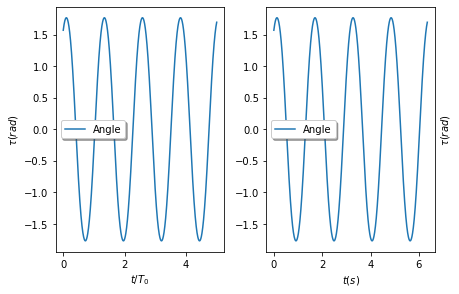

In [1]:
figtemporel,(axtempAdim,axtempDim) = plt.subplots(1,2) #pour avoir deux figures côte à côte
figtemporel.tight_layout()
axtempAdim.plot(tau,angles,label='Angle')
axtempAdim.set_xlabel(r"$t/T_0$")
axtempAdim.set_ylabel(r"$\tau(rad)$" )
axtempAdim.legend(loc='best',shadow=True)

axtempDim.plot(instants,angles,label='Angle')
axtempDim.set_xlabel(r"$t(s)$")
axtempDim.set_ylabel(r"$\tau(rad)$" )
axtempDim.yaxis.set_label_position("right")
axtempDim.legend(loc='best',shadow=True)

figtemporel.show()

Remarquons qu'ici la période n'est pas égale à $T_0$ puisque
l'approximation des oscillations de faible amplitude n'est pas
légitime.

On peut également tracer la trajectoire dans l'espace des phases en
traçant $\frac{\mathrm{d} \theta}{\mathrm{d} t}$ en fonction de
$\theta$. On ne la trace que sur une durée $T_0$: on observe ainsi
que la période est supérieure, pour cette amplitude, à $T_0$
puisqu'on n'effectue pas une oscillation complète en $T_0$.



# Out[308]:

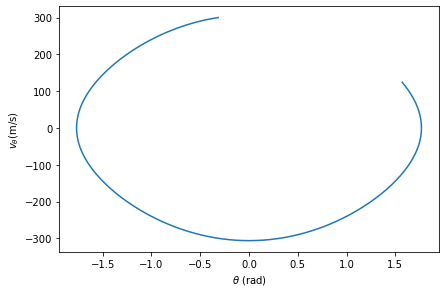

In [1]:
figphase,axphase = plt.subplots()
figphase.tight_layout()
axphase.plot(anglesMasked,vitessesMasked)
axphase.set_xlabel(r"$\theta$ (rad)")
axphase.set_ylabel(r"$v_\theta$(m/s)" )

figphase.show()

Remarquons que l'utilisation de la fonction `solve_ivp` permettrait de
déterminer directement la période puisque son argument `events`
permettrait de renvoyer la valeur de l'instant où $\dot{\theta}=0$
s'annule, soit, si l'objet a été lâché sans vitesse initiale, la durée
d'une demi-période.

Enfin, dans le cas d'un mouvement à $N$ degrés de libertés, on
utilisera un système de $2 N$ équations différentielles de degré
$1$. Pour un mouvement dans le plan $x,z$, on utilisera par
exemple les grandeurs $x,z,x^\prime, z^\prime$.



## Questions du DM06



### II.3.b



L'équation différentielle adimensionnée est:



In [1]:
def systdiffF(u,T):
    X,Z,Xp,Zp = u
    # dX/dT= Xp, dZ/dT = Zp
    # dXp/dT = - (Xp^2 + Zp^2)^(1/2) Xp
    # dZp/dT = -1 - (Xp^2 + Zp^2)^(1/2) Zp
    return [Xp, Zp, - np.sqrt( Xp**2 + Zp**2 ) * Xp, -1 - np.sqrt( Xp**2 + Zp**2 ) * Zp]

On adapte ensuite le code précédent. On doit traiter deux cas selon
les valeurs de $r$. En effet, une même valeur initiale de la vitesse
$v_0$ correspondra à des valeurs différentes pour la vitesse
adimensionnée puisque la vitesse asymptotique varie avec $r$.

On utilise un masque pour ne conserver que la portion de la
trajectoire au dessus du sol \ie $Z \geq 0$.



In [1]:
rho = 1.0e3 #kg/m^3
g0 = 9.8 # m/s^2
rayons = np.array([1e-4,2.0e-3])# m on traite les deux valeurs de rayons simultanément
NombreRayons = len(rayons)
masses = rho*4*np.pi*rayons**3/3 # kg (array)
beta = .69 # kg/m^3

vinfs = masses * g0 /(beta * rayons**2) # m/s (array)
taus = vinfs/g0 # s (array)
LongueurCars = vinfs*taus # m (array)

T_min = 0
T_max = 2 #en unités de tau
NombrePoints = 2000
T = np.linspace(tau_min,tau_max,NombrePoints)

instants = T*tau

alpha0 = 45 #degrés
X0,Z0, = 0,0 #position initiale
v0 =  50 #vitesse (m/s)
Xp0s = v0*np.cos(alpha0*np.pi/180)/vinfs #sans unité, array
Zp0s = v0*np.sin(alpha0*np.pi/180)/vinfs #sans unité, array
CIs = [[X0,Z0,Xp0s[i],Zp0s[i]] for i in range(NombreRayons)]   # array of arrays

sols = [odeint(systdiffF,CIs[i],T) for i in range(NombreRayons)]

:results:
  # Out[310]:
  :end:

\#+end<sub>src</sub>



### II.3.c



On trace enfin les trajectoires en coordonnées adimensionnées
 $X,Z$. On observe bien que la vitesse initiale en variables
 adimensionnées est d'autant plus faible que $r$ est élevé puisque
 la vitesse asymptotique est croissante avec $r$.



# Out[311]:

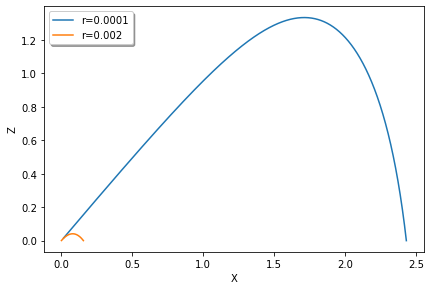

In [1]:
[X,Z,Xp,Zp] = np.array([[[valeur[j] for valeur in sols[i]] for i in range(NombreRayons)] for j in range(4)]) #arrays or arrays
masks = [ma.masked_less_equal(Z[i],0).mask for i in range(NombreRayons)] #pour ne conserver que les points Z>0

figGouttesAdim,axGouttesAdim = plt.subplots()
figGouttesAdim.tight_layout()
axGouttesAdim.plot(X[0][~masks[0]],Z[0][~masks[0]],label=f'r={rayons[0]}')
axGouttesAdim.plot(X[1][~masks[1]],Z[1][~masks[1]],label=f'r={rayons[1]}')
axGouttesAdim.set_xlabel(r"X")
axGouttesAdim.set_ylabel(r"Z")
axGouttesAdim.legend(loc='best',shadow=True)
figGouttesAdim.show()

On trace ensuite les trajectoires en coordonnées $x,z$
dimensionnées. On calcule et affiche également la flèche et la
portée.



# Out[312]:

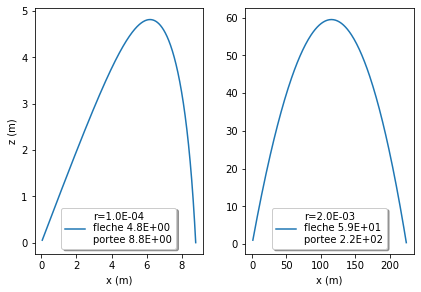

In [1]:
x = np.array([[valeur *LongueurCars[i] for valeur in X[i]] for i in range(NombreRayons)]) #array of NombreRayons x NomtrePoints
z = np.array([[valeur *LongueurCars[i] for valeur in Z[i]] for i in range(NombreRayons)])

xmasked = [x[i][~masks[i]] for i in range(NombreRayons)]
portee = [np.max(abscisses) for abscisses in xmasked]
zmasked = [z[i][~masks[i]] for i in range(NombreRayons)]
fleche = [np.max(ordonnees) for ordonnees in zmasked]

figGouttesDim,axGouttesDim = plt.subplots(1,2)
figGouttesDim.tight_layout()
# axGouttesDim[0].plot(x[0][~masks[0]],z[0][~masks[0]],label=f'r={rayons[0]}')
# axGouttesDim[1].plot(x[1][~masks[1]],z[1][~masks[1]],label=f'r={rayons[1]}')
axGouttesDim[0].plot(xmasked[0],zmasked[0],label=f'r={rayons[0]:.1E}\nfleche {fleche[0]:.1E}\nportee {portee[0]:.1E}')
axGouttesDim[1].plot(xmasked[1],zmasked[1],label=f'r={rayons[1]:.1E}\nfleche {fleche[1]:.1E}\nportee {portee[1]:.1E}')
axGouttesDim[0].set_xlabel(r"x (m)")
axGouttesDim[1].set_xlabel(r"x (m)")
axGouttesDim[0].set_ylabel(r"z (m)")
axGouttesDim[0].legend(loc='best',shadow=True)
axGouttesDim[1].legend(loc='best',shadow=True)
figGouttesDim.show()